In [ ]:
#https://scipython.com/book/chapter-7-matplotlib/examples/the-two-dimensional-diffusion-equation/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append('../')
import importlib
import torch



0 1
10 2
50 3
100 4


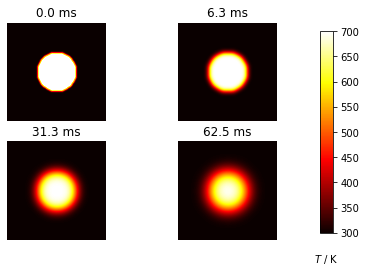

In [2]:
# plate size, mm
w = h = 10.
# intervals in x-, y- directions, mm
dx = dy = 0.1
# Thermal diffusivity of steel, mm2.s-1
D = 4.

Tcool, Thot = 300, 700

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = Tcool * np.ones((nx, ny))
u = u0.copy()

# Initial conditions - ring of inner radius r, width dr centred at (cx,cy) (mm)
r, cx, cy = 2, 5, 5
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            u0[i,j] = Thot

def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 101
# Output 4 figures at these timesteps
mfig = [0, 10, 50, 100]
fignum = 0
fig = plt.figure()
for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u.copy(), cmap=plt.get_cmap('hot'), vmin=Tcool,vmax=Thot)
        ax.set_axis_off()
        ax.set_title('{:.1f} ms'.format(m*dt*1000))
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()

See also https://github.com/JohnBracken/PDE-2D-Heat-Equation/blob/master/PDE_Heat.py

# with py-pde package

In [ ]:
# https://github.com/zwicker-group/py-pde
# https://py-pde.readthedocs.io/en/latest/examples_gallery/

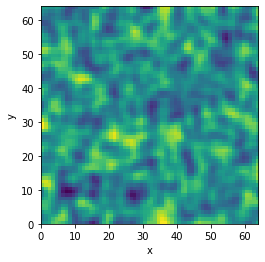

In [3]:
import pde

grid = pde.UnitGrid([64, 64])                 # generate grid
state = pde.ScalarField.random_uniform(grid)  # generate initial condition

eq = pde.DiffusionPDE(diffusivity=0.1)        # define the pde
result = eq.solve(state, t_range=10)          # solve the pde
result.plot()                                 # plot the resulting field

In [4]:
import pde

grid = pde.UnitGrid([64, 64])                 # generate grid
state = pde.ScalarField.random_uniform(grid)  # generate initial condition

tracker = pde.trackers.PlotTracker(interval=1, show=True)

eq = pde.DiffusionPDE(diffusivity=0.1)        # define the pde
result = eq.solve(state, t_range=50,dt=0.1,tracker=tracker)          # solve the pde
#result.plot()     

Output()

Spent more time on handling trackers (8.261426999999994) than on the actual simulation (0.922396000000008)


AttributeError: 'ScalarField' object has no attribute 'shape'

## Heat Equation

In [12]:
import pde

# The Heat equation == Diffusion equation with constant Diffusion

grid = pde.UnitGrid([64, 64])                 # generate grid
state = pde.ScalarField.random_uniform(grid)  # generate initial condition

tracker = pde.trackers.PlotTracker(interval=1, show=True)

eq = pde.DiffusionPDE(diffusivity=1)  # Corresponds      # define the pde
result = eq.solve(state, t_range=50,dt=0.1,tracker=tracker)  

Output()

Spent more time on handling trackers (8.892545999999967) than on the actual simulation (1.6511940000000322)


In [13]:
result

ScalarField(grid=UnitGrid(shape=(64, 64), periodic=[False, False]), data=[[0.49959766 0.4994841  0.49926457 ... 0.52395292 0.5240547  0.52410649]
 [0.49953534 0.49942335 0.49920689 ... 0.52407774 0.52418145 0.52423421]
 [0.49941434 0.49930542 0.49909501 ... 0.52432217 0.5244297  0.52448437]
 ...
 [0.49168282 0.49173435 0.49183984 ... 0.51633068 0.51664098 0.51679926]
 [0.49179555 0.49184729 0.49195326 ... 0.51632712 0.51664415 0.51680589]
 [0.49185348 0.49190532 0.49201148 ... 0.51632618 0.51664662 0.5168101 ]])

In [ ]:
### Fokker Planck

In [ ]:
grid = pde.UnitGrid([64, 64])                 # generate grid
state = pde.ScalarField.random_uniform(grid)  # generate initial condition

tracker = pde.trackers.PlotTracker(interval=1, show=True)

eq = pde.PDE()
result = eq.solve(state, t_range=50,dt=0.1,tracker=tracker)  

# fplanck Package
##### https://github.com/johnaparker/fplanck

In [14]:
#!pip install fplanck

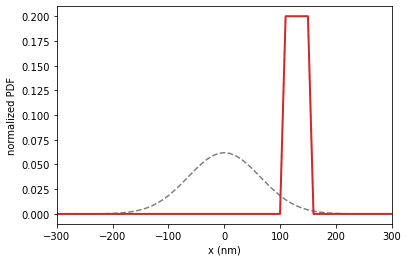

In [1]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML

import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from fplanck import fokker_planck, boundary, uniform_pdf, harmonic_potential

nm = 1e-9
viscosity = 8e-4
radius = 50*nm
drag = 6*np.pi*viscosity*radius



U = harmonic_potential((0), 1e-6)  # V(x) = ½ ∫ ‖x - x0‖²dρ(x)



sim = fokker_planck(temperature=300, drag=drag, extent=600*nm,
            resolution=10*nm, boundary=boundary.reflecting, potential=U)

### steady-state solution
steady = sim.steady_state()

### time-evolved solution
pdf = uniform_pdf(lambda x: (x > 100*nm) & (x < 150*nm))
p0 = pdf(sim.grid[0])
Nsteps = 200
time, Pt = sim.propagate_interval(pdf, 3e-3, Nsteps=Nsteps)

### animation
fig, ax = plt.subplots()

ax.plot(sim.grid[0]/nm, steady, color='k', ls='--', alpha=.5)
ax.plot(sim.grid[0]/nm, p0, color='red', ls='--', alpha=.3)
line, = ax.plot(sim.grid[0]/nm, p0, lw=2, color='C3')
ax.set(xlabel='x (nm)', ylabel='normalized PDF')
ax.margins(x=0)

def update(i):
    line.set_ydata(Pt[i])
    return [line]

anim = FuncAnimation(fig, update, frames=range(Nsteps), interval=30)


In [2]:
HTML(anim.to_html5_video())

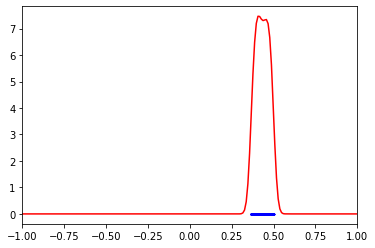

In [193]:
### Trying to replicate the above with our method
from torch.distributions import Uniform
from scipy.stats import gaussian_kde

n = 2000

# Normalize domain to [-1,1]
grid = sim.grid[0]/sim.grid[0].max()

nonz = grid[p0 >0]

ρ0 = Uniform(nonz.min(), nonz.max())

X = ρ0.sample(sample_shape=(n,))

# Sample particles
plt.show()

# Histogram
fig, ax = plt.subplots()
ax.set_xlim(-1,1)
xs = np.linspace(-1,1,200)
density = gaussian_kde(X, bw_method = .5)
ax.plot(xs, density(xs),  color='red', ls='-')#, alpha=.3)
ax.scatter(X, 0*X, color = 'b', s=0.5)

In [194]:
from src.functionals import Functional, PotentialFunctional, EntropyFunctional, FokkerPlanckFunctional
import importlib
importlib.reload(src.flow)
importlib.reload(src.utils)
importlib.reload(src.callbacks)

from src.flow import GradFlow
from src.utils import infer_input_type
from src.callbacks import PlottingCallback


F = EntropyFunctional(cg_iters = 2)

x0 = 0
l = 1e-2
F = FokkerPlanckFunctional(V = lambda x: l*torch.pow(x- x0, 2).sum())

#U = harmonic_potential((0), 1e-6)  # V(x) = ½ ∫ ‖x - x0‖²dρ(x)



cb = PlottingCallback(animate=True, show_density=True, show_trajectories=False, plot_pad=0.5)
gf = GradFlow(X, F=F, τ=1e-3, lr = 1e-4, callbacks=cb, optimizer = 'adam', opt_iters=200)

#print(gf.n, gf.dims, gf.flat_dim)

XT = gf.flow(steps=30)


tsnecuda not found - will use (slower) cpu implementation


It     W(ρ,ρ_t)   F(ρ)=     ℱ(ρ) +   𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
   0       1.31     9.17    -1.00    10.17     0.43     0.71   1.14e+00
 100       0.13    -0.82    -1.00     0.18     0.43     0.08   7.43e-03
 200       0.00     2.43    -1.00     3.43     0.43     0.41   3.49e-04
It     W(ρ,ρ_t)   F(ρ)=     ℱ(ρ) +   𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
   0       0.06     7.78    -1.00     8.78     0.41     0.65   2.44e-01
 100       0.00     2.26    -1.00     3.26     0.41     0.39   2.63e-04
 200       0.00     2.23    -1.00     3.23     0.41     0.39   4.58e-05
It     W(ρ,ρ_t)   F(ρ)=     ℱ(ρ) +   𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
   0       1.43    49.93    -1.00    50.93     0.39     1.57   1.18e+00
 100       0.06     7.07    -1.00     8.07     0.39     0.59   3.18e-02
 200       0.08     0.68    -1.00     1.68     0.39     0.17   6.82e-04
It     W(ρ,ρ_t)   F(ρ)=     ℱ(ρ) +   𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
   0       1.21    33.48    -1.00    34.48     0.16     1.25   1.08e+00


In [195]:
HTML(gf.callbacks.animation.to_html5_video()) # 2 

In [191]:
## Trying to understand fplanck's potentials

X = np.random.randn(10,2)


# insantiated fplanck potentials take as an input x0, x1, ... xd arrays of size n, ie. zipped across dims

U = harmonic_potential(np.array([0,0]), 1e-6)  # V(x) = ½ ∫ ‖x - x0‖²dρ(x)

print(U(*X.T).shape)


(10,)


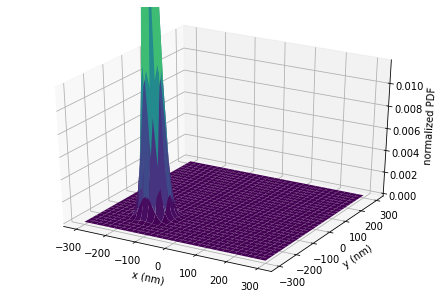

In [7]:
### Harmonic in 2d

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from fplanck import fokker_planck, boundary, gaussian_pdf, harmonic_potential
from mpl_toolkits.mplot3d import Axes3D

nm = 1e-9
viscosity = 8e-4
radius = 50*nm
drag = 6*np.pi*viscosity*radius

U = harmonic_potential((0,0), 1e-6)
sim = fokker_planck(temperature=300, drag=drag, extent=[600*nm, 600*nm],
            resolution=10*nm, boundary=boundary.reflecting, potential=U)

### time-evolved solution
pdf = gaussian_pdf(center=(-150*nm, -150*nm), width=30*nm)
p0 = pdf(*sim.grid)

Nsteps = 200
time, Pt = sim.propagate_interval(pdf, 2e-3, Nsteps=Nsteps)

### animation
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), constrained_layout=True)

surf = ax.plot_surface(*sim.grid/nm, p0, cmap='viridis')

ax.set_zlim([0,np.max(Pt)/3])
ax.autoscale(False)

def update(i):
    global surf
    surf.remove()
    surf = ax.plot_surface(*sim.grid/nm, Pt[i], cmap='viridis')

    return [surf]

anim = FuncAnimation(fig, update, frames=range(Nsteps), interval=30)
ax.set(xlabel='x (nm)', ylabel='y (nm)', zlabel='normalized PDF')

plt.show()


HTML(anim.to_html5_video())

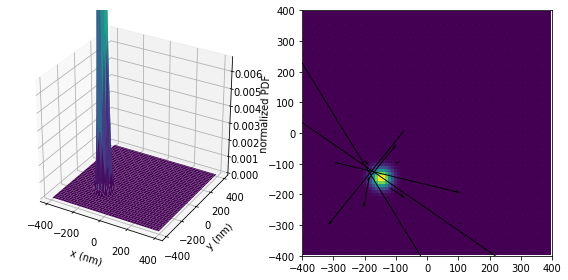

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from fplanck import fokker_planck, boundary, gaussian_pdf
from mpl_toolkits.mplot3d import Axes3D

nm = 1e-9
viscosity = 8e-4
radius = 50*nm
drag = 6*np.pi*viscosity*radius

def F(x, y):
    rad = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    L = 200*nm

    Fphi = 1e-12*rad/L*np.exp(-rad/L)
    Frad = 1e-12*(1 - rad/L)*np.exp(-rad/L)

    Fx = -np.sin(phi)*Fphi + np.cos(phi)*Frad
    Fy = np.cos(phi)*Fphi + np.sin(phi)*Frad
    return np.array([Fx, Fy])

sim = fokker_planck(temperature=300, drag=drag, extent=[800*nm, 800*nm],
            resolution=10*nm, boundary=boundary.reflecting, force=F)

### time-evolved solution
pdf = gaussian_pdf(center=(-150*nm, -150*nm), width=30*nm)
p0 = pdf(*sim.grid)

Nsteps = 200
time, Pt = sim.propagate_interval(pdf, 20e-3, Nsteps=Nsteps)

### animation
fig = plt.figure(figsize=plt.figaspect(1/2))
ax1 = fig.add_subplot(1,2,1, projection='3d')

surf = ax1.plot_surface(*sim.grid/nm, p0, cmap='viridis')

ax1.set_zlim([0,np.max(Pt)/5])
ax1.autoscale(False)

ax1.set(xlabel='x (nm)', ylabel='y (nm)', zlabel='normalized PDF')

ax2 = fig.add_subplot(1,2,2)

skip = 5
idx = np.s_[::skip, ::skip]
im = ax2.pcolormesh(*sim.grid/nm, p0, vmax=np.max(Pt)/5)
current = sim.probability_current(p0)
arrows = ax2.quiver(sim.grid[0][idx]/nm, sim.grid[1][idx]/nm, 
        current[0][idx], current[1][idx], pivot='mid')

xmax = 400
ax2.set_xlim([-xmax, xmax])
ax2.set_ylim([-xmax, xmax])

def update(i):
    global surf
    surf.remove()
    surf = ax1.plot_surface(*sim.grid/nm, Pt[i], cmap='viridis')

    data = Pt[i, :-1,:-1]
    im.set_array(np.ravel(data))
    im.set_clim(vmax=np.max(data))

    current = sim.probability_current(Pt[i])
    arrows.set_UVC(current[0][idx], current[1][idx])
    return [surf, im, arrows]

anim = FuncAnimation(fig, update, frames=range(Nsteps), interval=30)
plt.tight_layout()

plt.show()

In [9]:
HTML(anim.to_html5_video())

(80, 80)


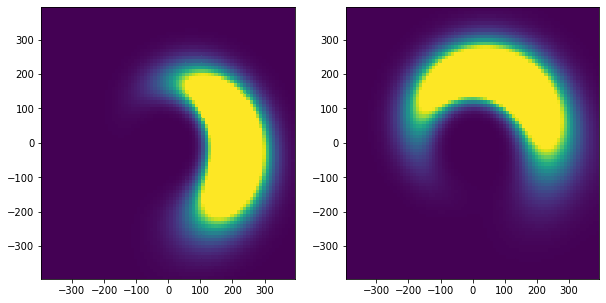

0.032924291437115324

In [84]:
def compare_pde_steps(r1, r2, grid, metric='l2'):
    assert r1.shape == r2.shape
    print(r1.shape)
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    #surf = ax[0].plot_surface(*grid, r1, cmap='viridis')
    vmax = max(np.max(r1)/5, np.max(r2)/5)
    im = ax[0].pcolormesh(*grid, r1, vmax=vmax)
    im = ax[1].pcolormesh(*grid, r2, vmax=vmax)
    
    if metric == 'l2':
        diff = np.linalg.norm(r1 - r2)#.mean(axis=0)
    
    plt.show()
    
    return diff
    
r1 = Pt[10]
r2 = Pt[15]


compare_pde_steps(r1, r2, sim.grid/nm)

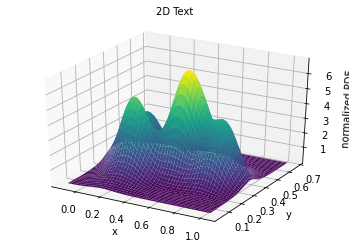

In [36]:
sys.path.append('../')
import importlib
import torch
import src.utils
importlib.reload(src.utils)
from src.utils import density_plot_3d
import src.distributions
from src.distributions import GMM

n = 1000 # Number of particles

# Simple Gaussian Density
Σ0 = torch.Tensor([[1e-2,0],[0,1e-2]])
μ0 = torch.Tensor([0.5,0.5])
ρ0 = torch.distributions.multivariate_normal.MultivariateNormal(μ0, Σ0)
X = ρ0.sample(sample_shape=(n,))

# Other more complex distributions
ρ0 = GMM(diagonal=False)
X = ρ0.sample(sample_shape=(n,))



fig = plt.figure()#figsize=self.figsize)
ax = fig.add_subplot(1, 1, 1, projection='3d')
density_plot_3d(X, cmap='viridis', ax= ax, show=False)
#ax.text(0.5, 1.01, 1, 'title', transform=ax.transAxes, ha='center',size=18)
ax.text2D(0.5, 1.01, "2D Text", ha='center', transform=ax.transAxes)

plt.show()